#Assignment 7 
  #1. Mount the drive
  #2. Append the drive path to system path
  #3. Import files/modules and execute modules

In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


I happen to have an existing `.py` file in Drive.

In [0]:
!ls /content/gdrive/My\ Drive/Colab\ Notebooks/eva-04/S6_Module/*.py

In [0]:
!cat '/content/gdrive/My Drive/Colab Notebooks/eva-04/S6_Module/global_fun.py'

We'll need to update our path to import from Drive.

In [0]:
import sys
sys.path.append('/content/gdrive/My Drive/Colab Notebooks/eva-04/S6_Module/')

Now we can import the library and use the function.

In [0]:
from __future__ import print_function
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms


In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
def miscImages(model, device, test_loader):
    model.eval()
    test_loss = 0
    incorrect = 0
    with torch.no_grad():
        for data, target in test_loader:
            data, target = data.to(device), target.to(device)
            output = model(data)
            pred = output.argmax(dim=1, keepdim=True)  # get the index of the max log-probability

            for i in range(len(target)):
              if pred[i].item() != target[i]:
                incorrect += 1
                print('\n\n{} [ Predicted Value: {}, Actual Value: {} ]'.format(
                incorrect, pred[i].item(), target[i], ))
                plt.imshow(data[i].cpu().numpy().squeeze(), cmap='gray_r')
                plt.show()


In [0]:

import matplotlib.pyplot as plt
def draw_accuracy_loss_change_graps(model_0,model_l1,model_l2,model_l1_l2):
    fig, axs = plt.subplots(2,2,figsize=(30,20))
    #print('train_losses=',len(train_losses))
    #print('test_losses=',len(test_losses))

    axs[0,0].plot(model_0.m_test_losses,color='black',label='No Regularization')
    axs[0,0].plot(model_l1.m_test_losses,color='red',label='L1 Regularization')
    axs[0,0].plot(model_l2.m_test_losses,color='blue',label='L2 Regularization')
    axs[0,0].plot(model_l1_l2.m_test_losses,color='green',label='Both L1 and L2 Regularization')
    axs[0,0].set_title("Validation Loss Change")
    axs[0,0].legend(loc="center")

    axs[0,1].plot(model_0.m_test_acc,color='black',label='No Regularization')
    axs[0,1].plot(model_l1.m_test_acc,color='red',label='L1 Regularization')
    axs[0,1].plot(model_l2.m_test_acc,color='blue',label='L2 Regularization')
    axs[0,1].plot(model_l1_l2.m_test_acc,color='green',label='Both L1 and L2 Regularization')
    axs[0,1].set_title("Validation Accuracy Change")
    axs[0,1].legend(loc="center")

    axs[1,0].plot(model_0.m_train_losses,color='black',label='No Regularization')
    axs[1,0].plot(model_l1.m_train_losses,color='red',label='L1 Regularization')
    axs[1,0].plot(model_l2.m_train_losses,color='blue',label='L2 Regularization')
    axs[1,0].plot(model_l1_l2.m_train_losses,color='green',label='Both L1 and L2 Regularization')
    axs[1,0].set_title("Training Loss Change")
    axs[1,0].legend(loc="center")

    axs[1,1].plot(model_0.m_train_acc,color='black',label='No Regularization')
    axs[1,1].plot(model_l1.m_train_acc,color='red',label='L1 Regularization')
    axs[1,1].plot(model_l2.m_train_acc,color='blue',label='L2 Regularization')
    axs[1,1].plot(model_l1_l2.m_train_acc,color='green',label='Both L1 and L2 Regularization')
    axs[1,1].set_title("Training Accuracy Change")
    axs[1,1].legend(loc="center")

In [0]:
#import Model as m
#import MnistModel as mnist

#import importlib
#importlib.reload(r)
#use_cuda = torch.cuda.is_available()
#device = torch.device("cuda" if use_cuda else "cpu")
#print(device)
#model = m.Model().to(device)

#import global_fun as gf
#importlib.reload(gf)
#from global_fun import test_model
#from global_fun import train_model
#from global_fun import show_summary, run_model 

#mnist_model = mnist.MnistModel(model)
#show_summary(mnist_model)
#run_model(mnist_model,device)
import Model as m
import MnistModel as mnist1

import importlib
importlib.reload(m)
importlib.reload(mnist1)

use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
print(device)
model = m.Model().to(device)

#import global_fun as gf
#importlib.reload(gf)
 
SEED = 1
# CUDA?
print("CUDA Available?", use_cuda)

# For reproducibility
torch.manual_seed(SEED)

if use_cuda:
    torch.cuda.manual_seed(SEED)

# dataloader arguments - something you'll fetch these from cmdprmt
dataloader_args = dict(shuffle=True, batch_size=128, num_workers=4, pin_memory=True) if use_cuda else dict(shuffle=True, batch_size=64)

# train dataloader
#train_loader = torch.utils.data.DataLoader(g_train, **dataloader_args)

# test dataloader
#test_loader = torch.utils.data.DataLoader(g_test, **dataloader_args)

mnist_model_0 = mnist1.MnistModel(model,dataloader_args)
mnist_model_l1 = mnist1.MnistModel(model,dataloader_args)
mnist_model_l2 = mnist1.MnistModel(model,dataloader_args)
mnist_model_l1_l2 = mnist1.MnistModel(model,dataloader_args)

from global_fun import test_model
from global_fun import train_model
from global_fun import show_summary, run_model 







cuda
CUDA Available? True


MODEL SUMMARY:

In [0]:
show_summary(mnist_model_0)

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 10, 26, 26]              90
              ReLU-2           [-1, 10, 26, 26]               0
       BatchNorm2d-3           [-1, 10, 26, 26]              20
           Dropout-4           [-1, 10, 26, 26]               0
            Conv2d-5           [-1, 10, 24, 24]             900
              ReLU-6           [-1, 10, 24, 24]               0
       BatchNorm2d-7           [-1, 10, 24, 24]              20
           Dropout-8           [-1, 10, 24, 24]               0
            Conv2d-9           [-1, 10, 24, 24]             100
        MaxPool2d-10           [-1, 10, 12, 12]               0
           Conv2d-11           [-1, 24, 10, 10]           2,160
             ReLU-12           [-1, 24, 10, 10]               0
      BatchNorm2d-13           [-1, 24, 10, 10]              48
          Dropout-14           [-1, 24,

RUNNING WITHOUT REGULARIZATION

In [0]:
run_model(mnist_model_0,device)

  0%|          | 0/469 [00:00<?, ?it/s]

EPOCH: 0


Loss=0.09273258596658707 Batch_id=468 Accuracy=84.24: 100%|██████████| 469/469 [00:21<00:00, 22.08it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.1158, Accuracy: 9685/10000 (96.85%)

EPOCH: 1


Loss=0.04563094675540924 Batch_id=468 Accuracy=97.25: 100%|██████████| 469/469 [00:21<00:00, 22.17it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0526, Accuracy: 9839/10000 (98.39%)

EPOCH: 2


Loss=0.07859183102846146 Batch_id=468 Accuracy=97.80: 100%|██████████| 469/469 [00:21<00:00, 26.32it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0388, Accuracy: 9874/10000 (98.74%)

EPOCH: 3


Loss=0.05718481168150902 Batch_id=468 Accuracy=98.11: 100%|██████████| 469/469 [00:21<00:00, 22.09it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0392, Accuracy: 9874/10000 (98.74%)

EPOCH: 4


Loss=0.04558303952217102 Batch_id=468 Accuracy=98.32: 100%|██████████| 469/469 [00:21<00:00, 21.67it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0302, Accuracy: 9911/10000 (99.11%)

EPOCH: 5


Loss=0.14523781836032867 Batch_id=468 Accuracy=98.42: 100%|██████████| 469/469 [00:21<00:00, 21.82it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0428, Accuracy: 9885/10000 (98.85%)

EPOCH: 6


Loss=0.0394420251250267 Batch_id=468 Accuracy=98.54: 100%|██████████| 469/469 [00:21<00:00, 27.79it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0320, Accuracy: 9908/10000 (99.08%)

EPOCH: 7


Loss=0.08278380334377289 Batch_id=468 Accuracy=98.59: 100%|██████████| 469/469 [00:21<00:00, 21.86it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0304, Accuracy: 9904/10000 (99.04%)

EPOCH: 8


Loss=0.04630507528781891 Batch_id=468 Accuracy=98.62: 100%|██████████| 469/469 [00:21<00:00, 21.92it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0218, Accuracy: 9925/10000 (99.25%)

EPOCH: 9


Loss=0.02361486293375492 Batch_id=468 Accuracy=98.79: 100%|██████████| 469/469 [00:21<00:00, 21.82it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0367, Accuracy: 9887/10000 (98.87%)

EPOCH: 10


Loss=0.021221337839961052 Batch_id=468 Accuracy=98.78: 100%|██████████| 469/469 [00:21<00:00, 21.77it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0241, Accuracy: 9928/10000 (99.28%)

EPOCH: 11


Loss=0.05377163365483284 Batch_id=468 Accuracy=98.79: 100%|██████████| 469/469 [00:22<00:00, 21.24it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0271, Accuracy: 9914/10000 (99.14%)

EPOCH: 12


Loss=0.030804866924881935 Batch_id=468 Accuracy=98.83: 100%|██████████| 469/469 [00:22<00:00, 21.26it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0246, Accuracy: 9923/10000 (99.23%)

EPOCH: 13


Loss=0.031686633825302124 Batch_id=468 Accuracy=98.86: 100%|██████████| 469/469 [00:21<00:00, 21.70it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0241, Accuracy: 9928/10000 (99.28%)

EPOCH: 14


Loss=0.007755592465400696 Batch_id=468 Accuracy=98.85: 100%|██████████| 469/469 [00:21<00:00, 21.66it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0233, Accuracy: 9920/10000 (99.20%)

EPOCH: 15


Loss=0.054581958800554276 Batch_id=468 Accuracy=98.87: 100%|██████████| 469/469 [00:21<00:00, 21.67it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0205, Accuracy: 9935/10000 (99.35%)

EPOCH: 16


Loss=0.015655988827347755 Batch_id=468 Accuracy=98.92: 100%|██████████| 469/469 [00:22<00:00, 25.52it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0222, Accuracy: 9930/10000 (99.30%)

EPOCH: 17


Loss=0.022498831152915955 Batch_id=468 Accuracy=99.02: 100%|██████████| 469/469 [00:21<00:00, 21.46it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0207, Accuracy: 9933/10000 (99.33%)

EPOCH: 18


Loss=0.027232229709625244 Batch_id=468 Accuracy=99.02: 100%|██████████| 469/469 [00:21<00:00, 26.47it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0216, Accuracy: 9932/10000 (99.32%)

EPOCH: 19


Loss=0.03631685674190521 Batch_id=468 Accuracy=98.97: 100%|██████████| 469/469 [00:21<00:00, 21.57it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0229, Accuracy: 9922/10000 (99.22%)

EPOCH: 20


Loss=0.14697985351085663 Batch_id=468 Accuracy=98.94: 100%|██████████| 469/469 [00:21<00:00, 21.51it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0215, Accuracy: 9938/10000 (99.38%)

EPOCH: 21


Loss=0.04036807268857956 Batch_id=468 Accuracy=98.97: 100%|██████████| 469/469 [00:21<00:00, 21.98it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0231, Accuracy: 9931/10000 (99.31%)

EPOCH: 22


Loss=0.034471843391656876 Batch_id=468 Accuracy=99.01: 100%|██████████| 469/469 [00:21<00:00, 21.65it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0228, Accuracy: 9925/10000 (99.25%)

EPOCH: 23


Loss=0.06300991028547287 Batch_id=468 Accuracy=99.03: 100%|██████████| 469/469 [00:21<00:00, 26.55it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0225, Accuracy: 9926/10000 (99.26%)

EPOCH: 24


Loss=0.0065078637562692165 Batch_id=468 Accuracy=99.01: 100%|██████████| 469/469 [00:22<00:00, 21.11it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0217, Accuracy: 9927/10000 (99.27%)

EPOCH: 25


Loss=0.03760060295462608 Batch_id=468 Accuracy=99.10: 100%|██████████| 469/469 [00:21<00:00, 27.64it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0199, Accuracy: 9936/10000 (99.36%)

EPOCH: 26


Loss=0.03673214837908745 Batch_id=468 Accuracy=99.07: 100%|██████████| 469/469 [00:21<00:00, 27.14it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0198, Accuracy: 9942/10000 (99.42%)

EPOCH: 27


Loss=0.06416299194097519 Batch_id=468 Accuracy=99.09: 100%|██████████| 469/469 [00:21<00:00, 21.43it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0200, Accuracy: 9936/10000 (99.36%)

EPOCH: 28


Loss=0.11701011657714844 Batch_id=468 Accuracy=99.14: 100%|██████████| 469/469 [00:22<00:00, 21.30it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0209, Accuracy: 9933/10000 (99.33%)

EPOCH: 29


Loss=0.012744233012199402 Batch_id=468 Accuracy=99.00: 100%|██████████| 469/469 [00:22<00:00, 27.45it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0218, Accuracy: 9930/10000 (99.30%)

EPOCH: 30


Loss=0.03128790855407715 Batch_id=468 Accuracy=99.14: 100%|██████████| 469/469 [00:21<00:00, 21.44it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0202, Accuracy: 9937/10000 (99.37%)

EPOCH: 31


Loss=0.02544422447681427 Batch_id=468 Accuracy=99.14: 100%|██████████| 469/469 [00:21<00:00, 21.51it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0186, Accuracy: 9937/10000 (99.37%)

EPOCH: 32


Loss=0.031478699296712875 Batch_id=468 Accuracy=99.14: 100%|██████████| 469/469 [00:21<00:00, 22.07it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0216, Accuracy: 9929/10000 (99.29%)

EPOCH: 33


Loss=0.01868312805891037 Batch_id=468 Accuracy=99.18: 100%|██████████| 469/469 [00:21<00:00, 22.28it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0208, Accuracy: 9930/10000 (99.30%)

EPOCH: 34


Loss=0.017348328605294228 Batch_id=468 Accuracy=99.16: 100%|██████████| 469/469 [00:21<00:00, 22.21it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0185, Accuracy: 9932/10000 (99.32%)

EPOCH: 35


Loss=0.021332070231437683 Batch_id=468 Accuracy=99.15: 100%|██████████| 469/469 [00:21<00:00, 22.18it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0190, Accuracy: 9930/10000 (99.30%)

EPOCH: 36


Loss=0.021992573514580727 Batch_id=468 Accuracy=99.13: 100%|██████████| 469/469 [00:21<00:00, 22.09it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0229, Accuracy: 9924/10000 (99.24%)

EPOCH: 37


Loss=0.005051076412200928 Batch_id=468 Accuracy=99.18: 100%|██████████| 469/469 [00:21<00:00, 22.12it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0215, Accuracy: 9926/10000 (99.26%)

EPOCH: 38


Loss=0.03340321406722069 Batch_id=468 Accuracy=99.12: 100%|██████████| 469/469 [00:21<00:00, 22.29it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0191, Accuracy: 9939/10000 (99.39%)

EPOCH: 39


Loss=0.002493078587576747 Batch_id=468 Accuracy=99.19: 100%|██████████| 469/469 [00:21<00:00, 21.91it/s]



Test set: Average loss: 0.0180, Accuracy: 9943/10000 (99.43%)



RUNNING WITH L1 REGULARIZATION

In [0]:
import global_fun as gf
importlib.reload(gf)
run_model(mnist_model_l1,device, doL1 = 1, doL2 = 0, LAMBDA = 0.0005)


Loss=0.5085850358009338 Batch_id=400 Accuracy=99.20:  85%|████████▌ | 400/469 [00:23<00:03, 18.64it/s]
Loss=0.5286276340484619 Batch_id=401 Accuracy=99.20:  85%|████████▌ | 400/469 [00:23<00:03, 18.64it/s]
Loss=0.5286276340484619 Batch_id=401 Accuracy=99.20:  86%|████████▌ | 402/469 [00:23<00:03, 17.61it/s]
Loss=0.5072799324989319 Batch_id=402 Accuracy=99.20:  86%|████████▌ | 402/469 [00:23<00:03, 17.61it/s]
Loss=0.504337728023529 Batch_id=403 Accuracy=99.21:  86%|████████▌ | 402/469 [00:23<00:03, 17.61it/s] 
Loss=0.5603073835372925 Batch_id=404 Accuracy=99.20:  86%|████████▌ | 402/469 [00:23<00:03, 17.61it/s]
Loss=0.5603073835372925 Batch_id=404 Accuracy=99.20:  86%|████████▋ | 405/469 [00:23<00:03, 18.38it/s]
Loss=0.5187059640884399 Batch_id=405 Accuracy=99.20:  86%|████████▋ | 405/469 [00:23<00:03, 18.38it/s]
Loss=0.5041481852531433 Batch_id=406 Accuracy=99.20:  86%|████████▋ | 405/469 [00:23<00:03, 18.38it/s]
Loss=0.5407705307006836 Batch_id=407 Accuracy=99.20:  86%|████████▋ | 40


Test set: Average loss: 0.0232, Accuracy: 9932/10000 (99.32%)

EPOCH: 39



Loss=0.5091683268547058 Batch_id=0 Accuracy=99.22:   0%|          | 0/469 [00:00<?, ?it/s]
Loss=0.5091683268547058 Batch_id=0 Accuracy=99.22:   0%|          | 1/469 [00:00<03:34,  2.18it/s]
Loss=0.5230064988136292 Batch_id=1 Accuracy=99.22:   0%|          | 1/469 [00:00<03:34,  2.18it/s]
Loss=0.602300226688385 Batch_id=2 Accuracy=99.22:   0%|          | 1/469 [00:00<03:34,  2.18it/s] 
Loss=0.602300226688385 Batch_id=2 Accuracy=99.22:   1%|          | 3/469 [00:00<02:40,  2.90it/s]
Loss=0.5063791275024414 Batch_id=3 Accuracy=99.41:   1%|          | 3/469 [00:00<02:40,  2.90it/s]
Loss=0.509181797504425 Batch_id=4 Accuracy=99.53:   1%|          | 3/469 [00:00<02:40,  2.90it/s] 
Loss=0.509181797504425 Batch_id=4 Accuracy=99.53:   1%|          | 5/469 [00:00<01:59,  3.88it/s]
Loss=0.5028576850891113 Batch_id=5 Accuracy=99.61:   1%|          | 5/469 [00:00<01:59,  3.88it/s]
Loss=0.5253456234931946 Batch_id=6 Accuracy=99.55:   1%|          | 5/469 [00:00<01:59,  3.88it/s]
Loss=0.525345623493


Test set: Average loss: 0.0209, Accuracy: 9934/10000 (99.34%)



RUNNING WITH L2 REGULARIZATION

In [0]:
run_model(mnist_model_l2,device, doL1 = 0, doL2 = 1, LAMBDA=0.0005)


RUNNING WITH L1 and L2 REGULARIZATION

In [0]:
run_model(mnist_model_l1_l2,device, doL1=1, doL2=1, LAMBDA=0.0005)



Loss=0.689904510974884 Batch_id=413 Accuracy=99.12:  88%|████████▊ | 412/469 [00:25<00:03, 16.71it/s] 
Loss=0.689904510974884 Batch_id=413 Accuracy=99.12:  88%|████████▊ | 414/469 [00:25<00:03, 15.63it/s]
Loss=0.7020859718322754 Batch_id=414 Accuracy=99.12:  88%|████████▊ | 414/469 [00:25<00:03, 15.63it/s]
Loss=0.6766980290412903 Batch_id=415 Accuracy=99.12:  88%|████████▊ | 414/469 [00:25<00:03, 15.63it/s]
Loss=0.6766980290412903 Batch_id=415 Accuracy=99.12:  89%|████████▊ | 416/469 [00:25<00:03, 16.53it/s]
Loss=0.6935274600982666 Batch_id=416 Accuracy=99.13:  89%|████████▊ | 416/469 [00:25<00:03, 16.53it/s]
Loss=0.6805884838104248 Batch_id=417 Accuracy=99.13:  89%|████████▊ | 416/469 [00:25<00:03, 16.53it/s]
Loss=0.6805884838104248 Batch_id=417 Accuracy=99.13:  89%|████████▉ | 418/469 [00:25<00:03, 16.34it/s]
Loss=0.7122642993927002 Batch_id=418 Accuracy=99.13:  89%|████████▉ | 418/469 [00:25<00:03, 16.34it/s]
Loss=0.7402620911598206 Batch_id=419 Accuracy=99.13:  89%|████████▉ | 418


Test set: Average loss: 0.0187, Accuracy: 9938/10000 (99.38%)



# ACCURACY , LOSS CHANGE GRAPHS

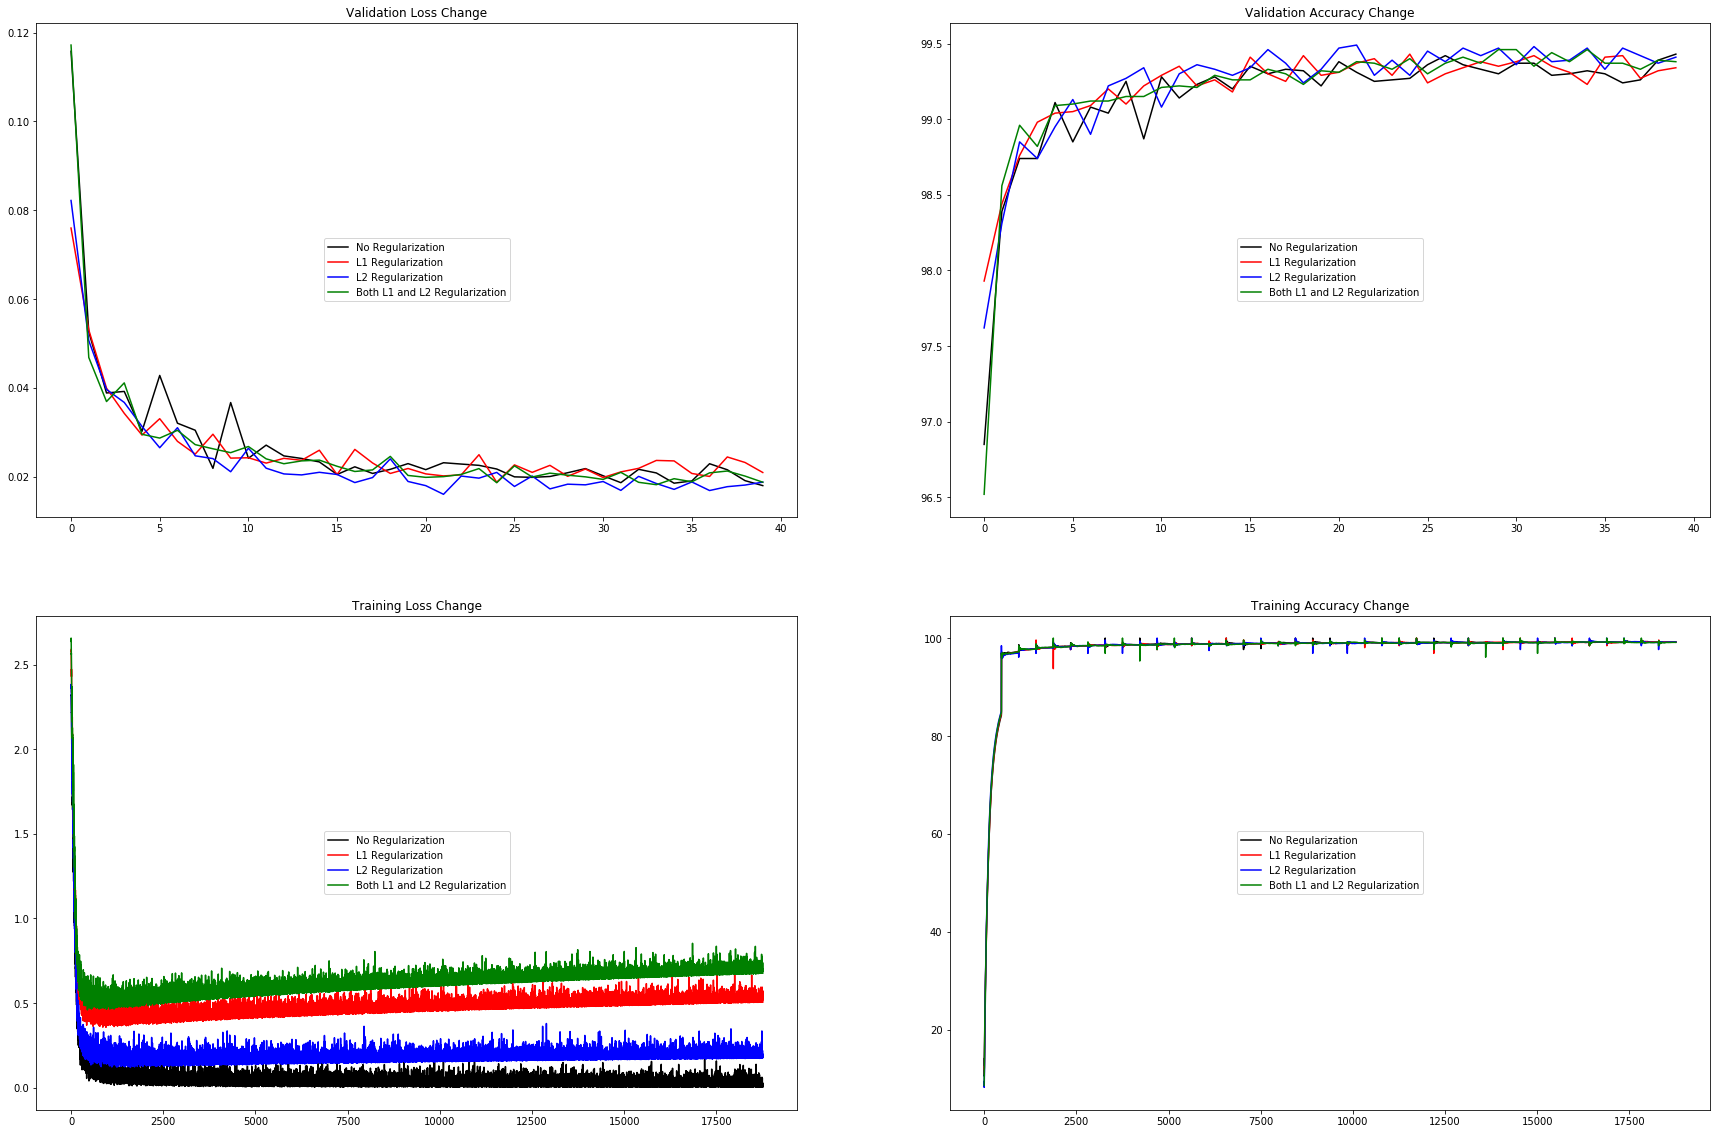

In [0]:
draw_accuracy_loss_change_graps(mnist_model_0,mnist_model_l1,mnist_model_l2,mnist_model_l1_l2)

L1 MIS-CLASSIFIED IMAGES



1 [ Predicted Value: 1, Actual Value: 6 ]


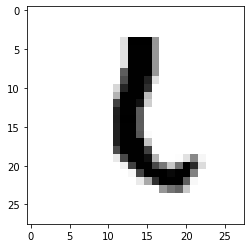



2 [ Predicted Value: 1, Actual Value: 6 ]


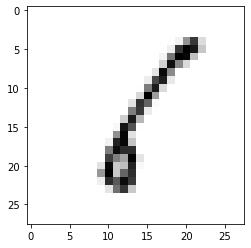



3 [ Predicted Value: 5, Actual Value: 3 ]


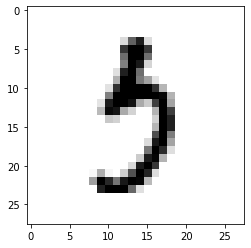



4 [ Predicted Value: 9, Actual Value: 4 ]


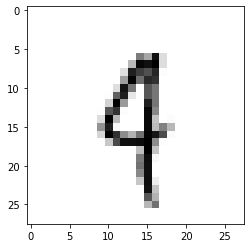



5 [ Predicted Value: 1, Actual Value: 7 ]


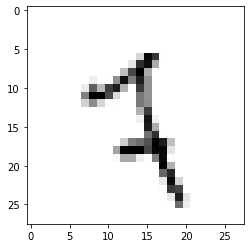



6 [ Predicted Value: 5, Actual Value: 6 ]


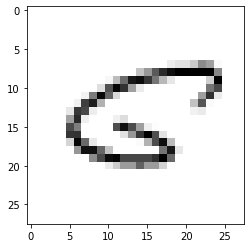



7 [ Predicted Value: 6, Actual Value: 0 ]


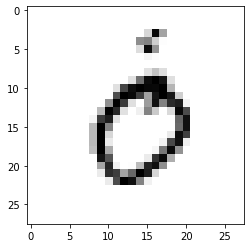



8 [ Predicted Value: 2, Actual Value: 1 ]


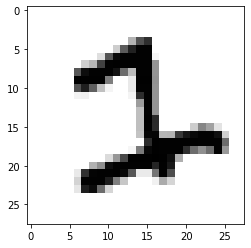



9 [ Predicted Value: 4, Actual Value: 9 ]


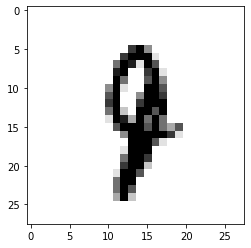



10 [ Predicted Value: 3, Actual Value: 5 ]


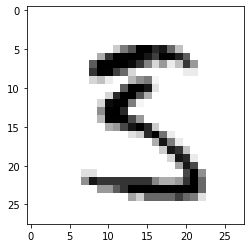



11 [ Predicted Value: 7, Actual Value: 4 ]


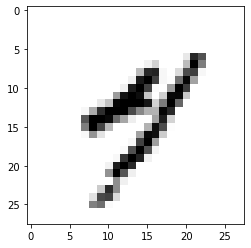



12 [ Predicted Value: 4, Actual Value: 6 ]


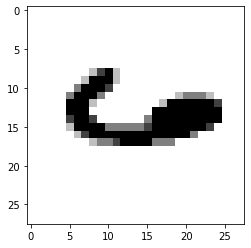



13 [ Predicted Value: 6, Actual Value: 5 ]


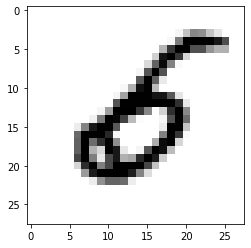



14 [ Predicted Value: 0, Actual Value: 6 ]


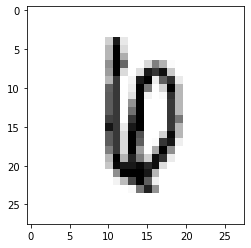



15 [ Predicted Value: 5, Actual Value: 3 ]


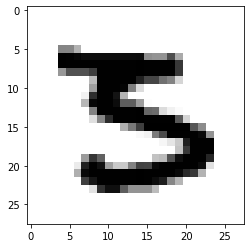



16 [ Predicted Value: 7, Actual Value: 2 ]


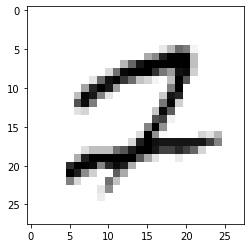



17 [ Predicted Value: 0, Actual Value: 6 ]


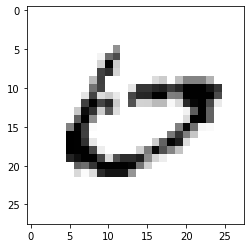



18 [ Predicted Value: 1, Actual Value: 2 ]


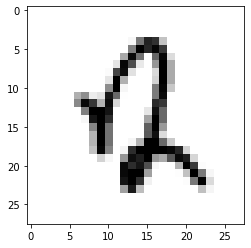



19 [ Predicted Value: 4, Actual Value: 9 ]


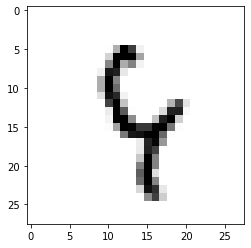



20 [ Predicted Value: 9, Actual Value: 4 ]


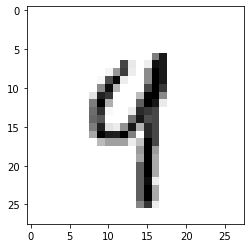



21 [ Predicted Value: 4, Actual Value: 9 ]


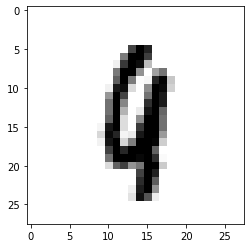



22 [ Predicted Value: 7, Actual Value: 9 ]


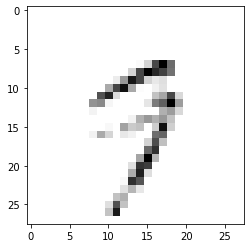



23 [ Predicted Value: 9, Actual Value: 4 ]


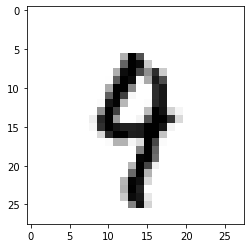



24 [ Predicted Value: 9, Actual Value: 4 ]


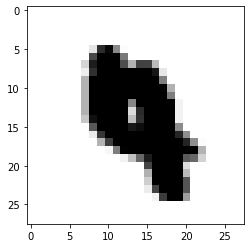



25 [ Predicted Value: 0, Actual Value: 8 ]


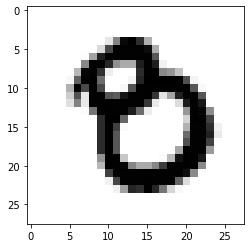



26 [ Predicted Value: 0, Actual Value: 5 ]


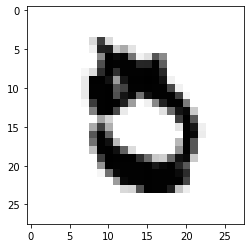



27 [ Predicted Value: 0, Actual Value: 2 ]


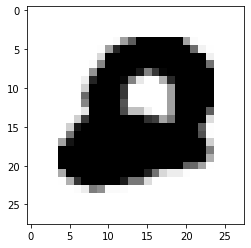



28 [ Predicted Value: 8, Actual Value: 9 ]


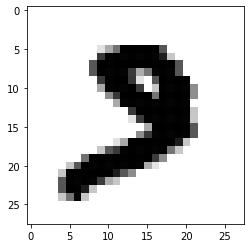



29 [ Predicted Value: 3, Actual Value: 5 ]


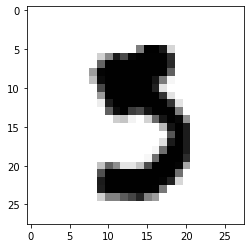



30 [ Predicted Value: 4, Actual Value: 9 ]


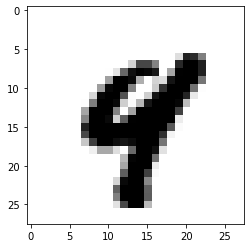



31 [ Predicted Value: 4, Actual Value: 9 ]


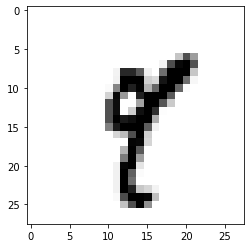



32 [ Predicted Value: 0, Actual Value: 8 ]


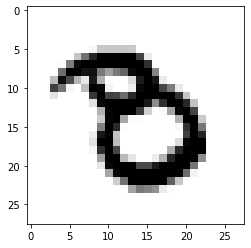



33 [ Predicted Value: 0, Actual Value: 6 ]


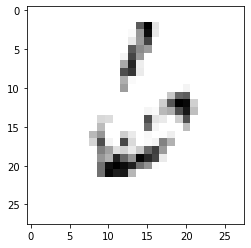



34 [ Predicted Value: 8, Actual Value: 4 ]


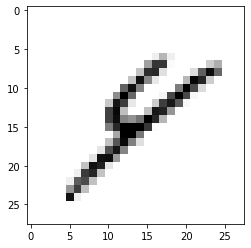



35 [ Predicted Value: 7, Actual Value: 8 ]


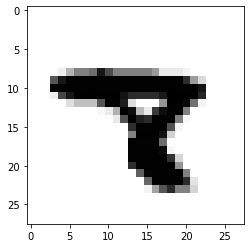



36 [ Predicted Value: 8, Actual Value: 9 ]


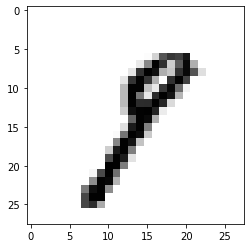



37 [ Predicted Value: 5, Actual Value: 8 ]


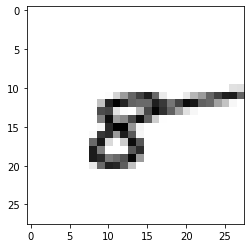



38 [ Predicted Value: 1, Actual Value: 6 ]


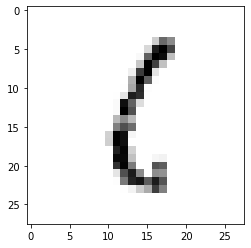



39 [ Predicted Value: 1, Actual Value: 7 ]


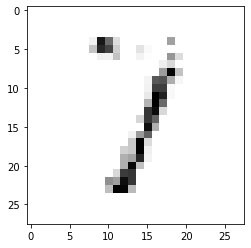



40 [ Predicted Value: 8, Actual Value: 7 ]


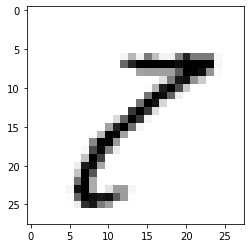



41 [ Predicted Value: 5, Actual Value: 3 ]


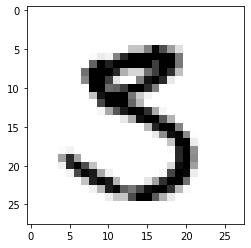



42 [ Predicted Value: 8, Actual Value: 9 ]


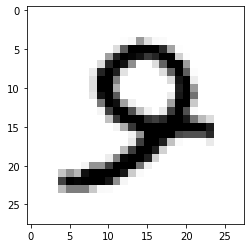



43 [ Predicted Value: 5, Actual Value: 3 ]


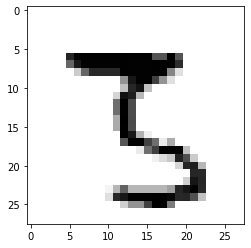



44 [ Predicted Value: 1, Actual Value: 3 ]


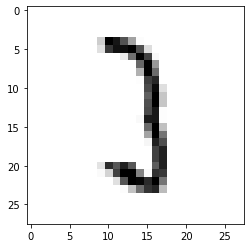



45 [ Predicted Value: 7, Actual Value: 3 ]


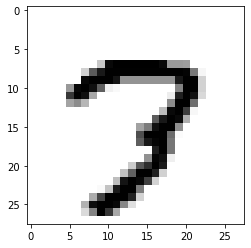



46 [ Predicted Value: 7, Actual Value: 2 ]


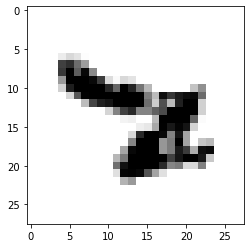



47 [ Predicted Value: 7, Actual Value: 3 ]


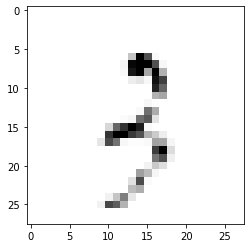



48 [ Predicted Value: 4, Actual Value: 9 ]


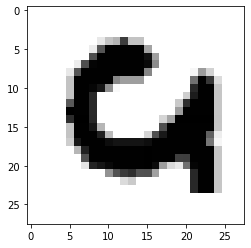



49 [ Predicted Value: 6, Actual Value: 0 ]


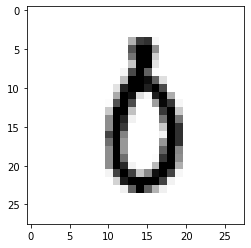



50 [ Predicted Value: 7, Actual Value: 2 ]


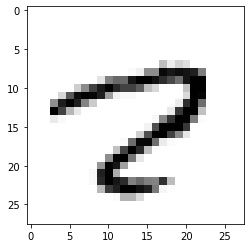



51 [ Predicted Value: 0, Actual Value: 1 ]


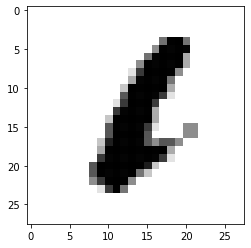



52 [ Predicted Value: 9, Actual Value: 8 ]


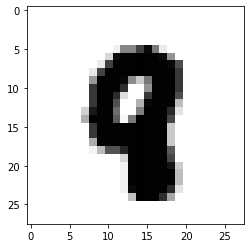



53 [ Predicted Value: 2, Actual Value: 8 ]


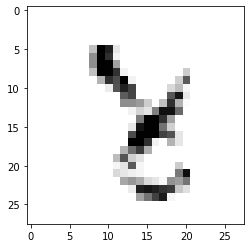



54 [ Predicted Value: 2, Actual Value: 7 ]


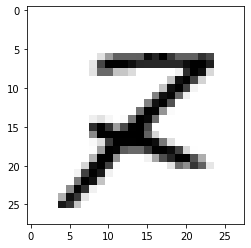



55 [ Predicted Value: 0, Actual Value: 6 ]


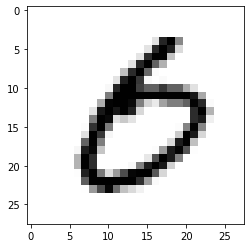



56 [ Predicted Value: 8, Actual Value: 6 ]


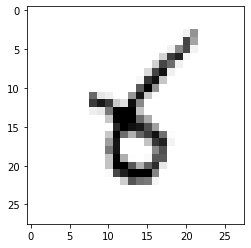



57 [ Predicted Value: 1, Actual Value: 7 ]


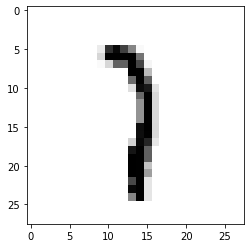



58 [ Predicted Value: 8, Actual Value: 9 ]


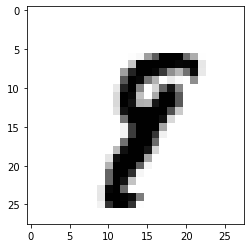



59 [ Predicted Value: 4, Actual Value: 9 ]


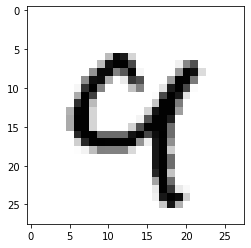



60 [ Predicted Value: 7, Actual Value: 0 ]


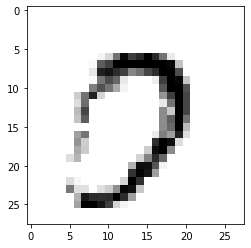



61 [ Predicted Value: 7, Actual Value: 9 ]


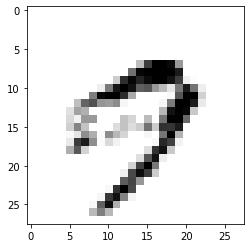



62 [ Predicted Value: 0, Actual Value: 6 ]


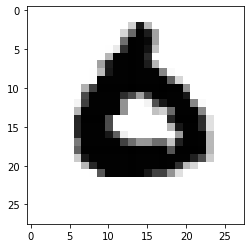



63 [ Predicted Value: 2, Actual Value: 7 ]


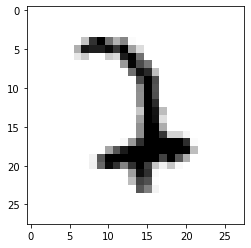



64 [ Predicted Value: 2, Actual Value: 8 ]


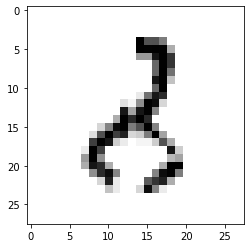



65 [ Predicted Value: 7, Actual Value: 2 ]


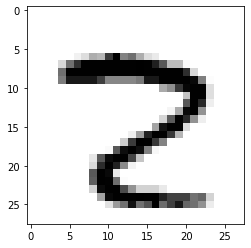



66 [ Predicted Value: 3, Actual Value: 5 ]


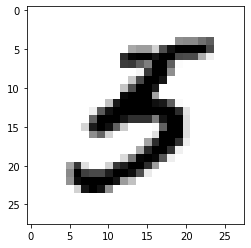

In [0]:
miscImages(mnist_model_l1.m_model, device, mnist_model_l1.m_test_loader)


L2 MIS-CLASSIFIED IMAGES



1 [ Predicted Value: 8, Actual Value: 6 ]


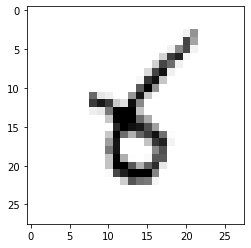



2 [ Predicted Value: 2, Actual Value: 0 ]


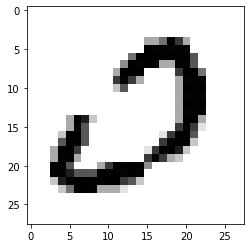



3 [ Predicted Value: 6, Actual Value: 5 ]


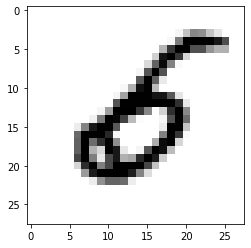



4 [ Predicted Value: 7, Actual Value: 2 ]


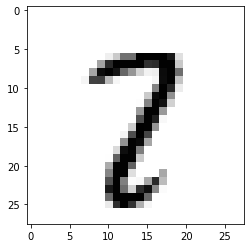



5 [ Predicted Value: 7, Actual Value: 2 ]


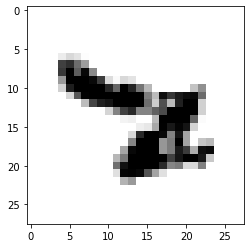



6 [ Predicted Value: 0, Actual Value: 5 ]


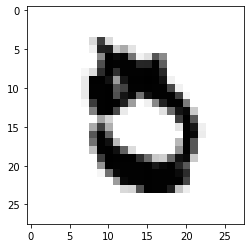



7 [ Predicted Value: 5, Actual Value: 3 ]


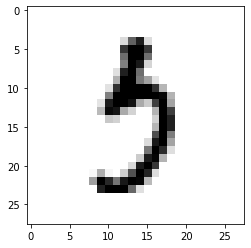



8 [ Predicted Value: 3, Actual Value: 8 ]


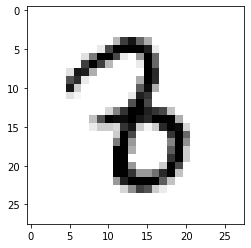



9 [ Predicted Value: 1, Actual Value: 2 ]


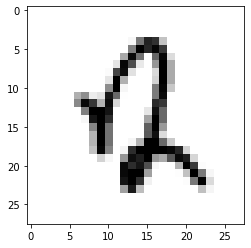



10 [ Predicted Value: 7, Actual Value: 8 ]


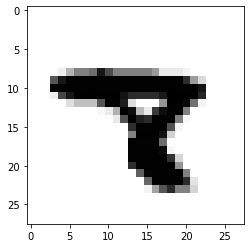



11 [ Predicted Value: 1, Actual Value: 7 ]


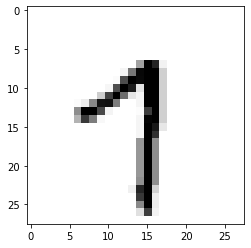



12 [ Predicted Value: 1, Actual Value: 6 ]


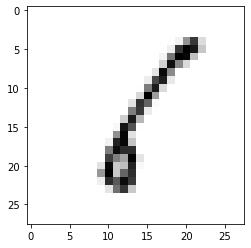



13 [ Predicted Value: 7, Actual Value: 0 ]


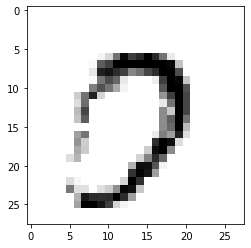



14 [ Predicted Value: 4, Actual Value: 9 ]


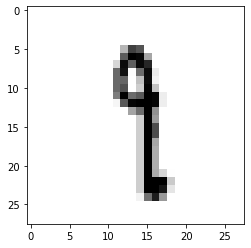



15 [ Predicted Value: 9, Actual Value: 4 ]


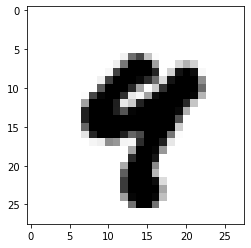



16 [ Predicted Value: 4, Actual Value: 9 ]


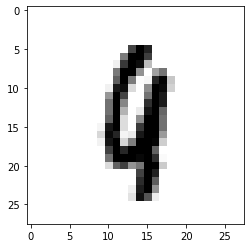



17 [ Predicted Value: 7, Actual Value: 2 ]


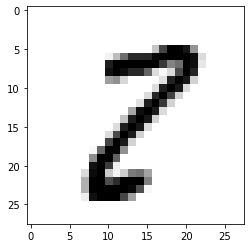



18 [ Predicted Value: 5, Actual Value: 9 ]


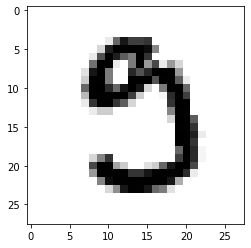



19 [ Predicted Value: 2, Actual Value: 7 ]


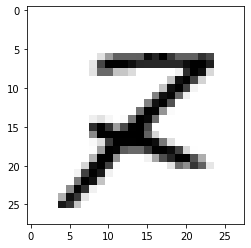



20 [ Predicted Value: 6, Actual Value: 0 ]


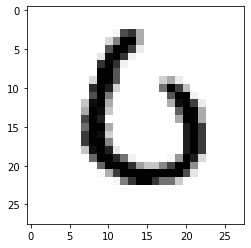



21 [ Predicted Value: 3, Actual Value: 5 ]


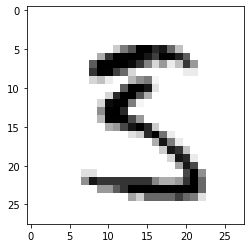



22 [ Predicted Value: 4, Actual Value: 9 ]


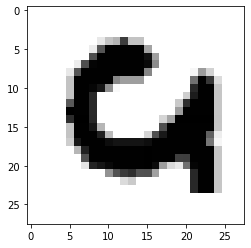



23 [ Predicted Value: 6, Actual Value: 0 ]


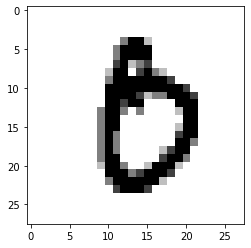



24 [ Predicted Value: 7, Actual Value: 2 ]


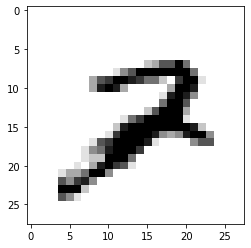



25 [ Predicted Value: 1, Actual Value: 9 ]


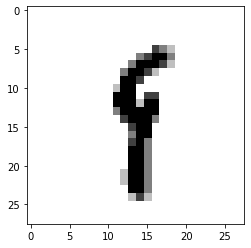



26 [ Predicted Value: 1, Actual Value: 7 ]


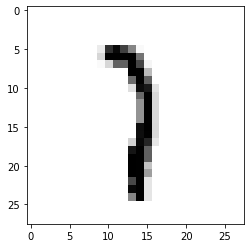



27 [ Predicted Value: 7, Actual Value: 5 ]


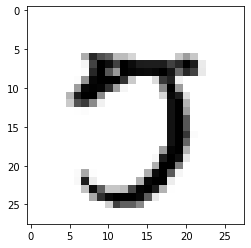



28 [ Predicted Value: 0, Actual Value: 6 ]


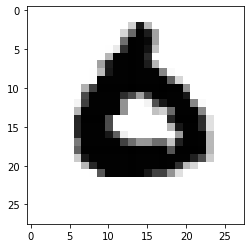



29 [ Predicted Value: 7, Actual Value: 3 ]


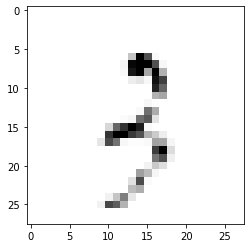



30 [ Predicted Value: 7, Actual Value: 8 ]


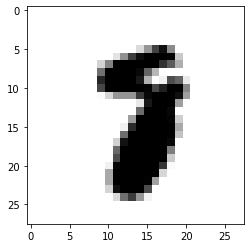



31 [ Predicted Value: 5, Actual Value: 6 ]


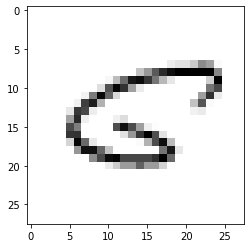



32 [ Predicted Value: 4, Actual Value: 9 ]


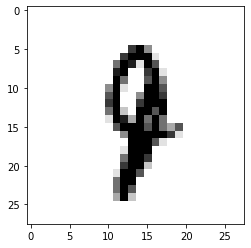



33 [ Predicted Value: 5, Actual Value: 3 ]


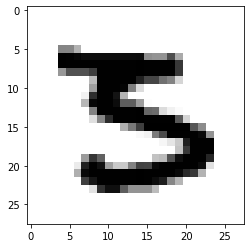



34 [ Predicted Value: 0, Actual Value: 9 ]


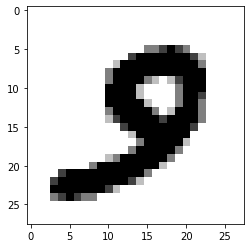



35 [ Predicted Value: 5, Actual Value: 3 ]


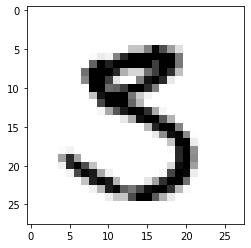



36 [ Predicted Value: 1, Actual Value: 2 ]


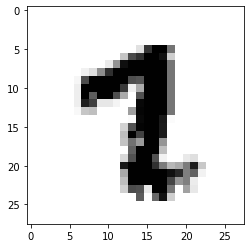



37 [ Predicted Value: 7, Actual Value: 9 ]


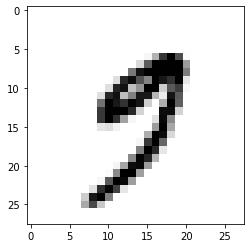



38 [ Predicted Value: 1, Actual Value: 7 ]


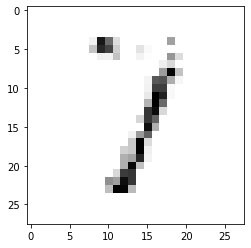



39 [ Predicted Value: 0, Actual Value: 2 ]


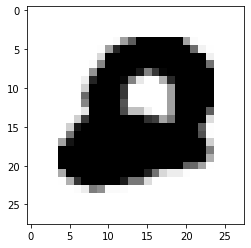



40 [ Predicted Value: 7, Actual Value: 2 ]


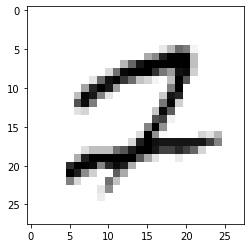



41 [ Predicted Value: 4, Actual Value: 6 ]


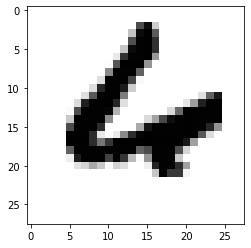



42 [ Predicted Value: 4, Actual Value: 9 ]


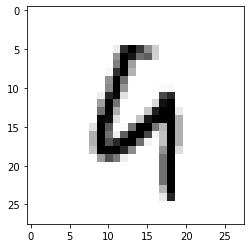



43 [ Predicted Value: 7, Actual Value: 2 ]


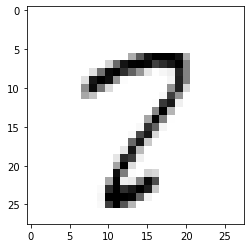



44 [ Predicted Value: 2, Actual Value: 8 ]


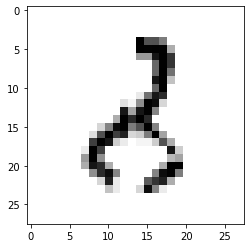



45 [ Predicted Value: 1, Actual Value: 3 ]


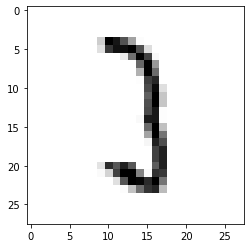



46 [ Predicted Value: 1, Actual Value: 5 ]


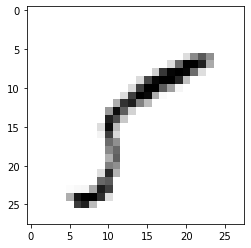



47 [ Predicted Value: 7, Actual Value: 8 ]


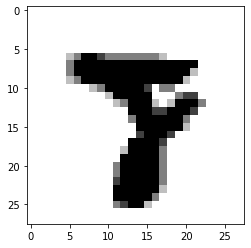



48 [ Predicted Value: 0, Actual Value: 6 ]


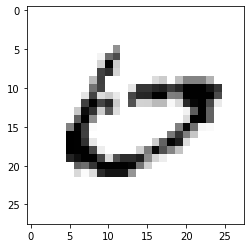



49 [ Predicted Value: 1, Actual Value: 7 ]


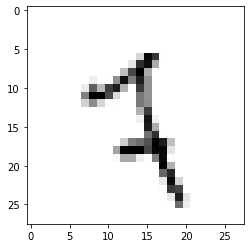



50 [ Predicted Value: 1, Actual Value: 4 ]


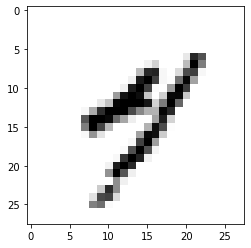



51 [ Predicted Value: 1, Actual Value: 6 ]


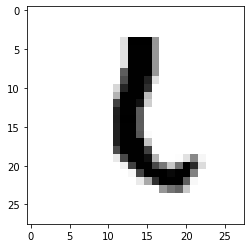



52 [ Predicted Value: 9, Actual Value: 8 ]


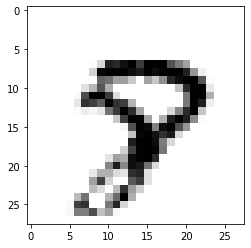



53 [ Predicted Value: 7, Actual Value: 9 ]


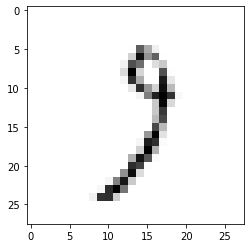



54 [ Predicted Value: 7, Actual Value: 3 ]


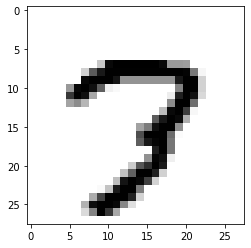



55 [ Predicted Value: 9, Actual Value: 8 ]


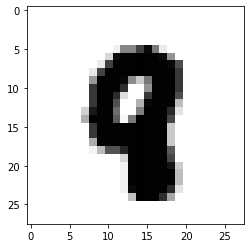



56 [ Predicted Value: 4, Actual Value: 9 ]


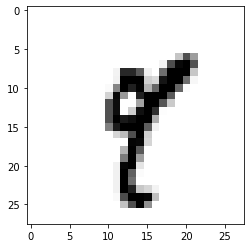



57 [ Predicted Value: 1, Actual Value: 6 ]


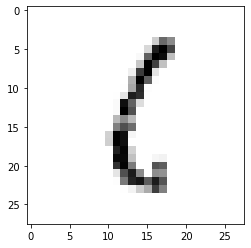



58 [ Predicted Value: 5, Actual Value: 8 ]


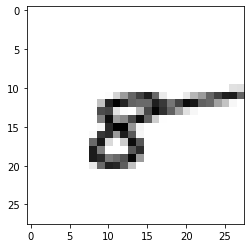



59 [ Predicted Value: 4, Actual Value: 9 ]


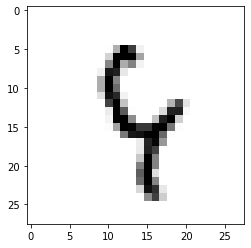

In [0]:
miscImages(mnist_model_l2.m_model, device, mnist_model_l2.m_test_loader)
